In [ ]:
from tables import start
start()

In [9]:
import pandas as pd
from value import Value
tab1 = pd.read_csv("tables/219_1.tab", sep="\t")
tab2 = pd.read_csv("tables/219_2.tab", sep="\t")
tab1["I"] = tab1["I"].apply(lambda x: Value(values=[x], syst=2 + 0.0025 * x))
tab1["U"] = tab1["U"].apply(lambda x: Value(values=[x], syst=2 + 0.0025 * x))
tab2["p"] = tab2["p"].apply(lambda x: Value(values=[x], syst=2 + 0.0025 * x))
tab2["flow"] = tab2["flow"].apply(lambda x: Value(values=[x], syst=0.2 + 0.0025 * x))

In [10]:
tab1

,I,U
0,100 ± 2,683 ± 4
1,120 ± 2,834 ± 4
2,140 ± 2,970 ± 4
3,160 ± 2,1131 ± 5
4,180 ± 2,1289 ± 5
5,200 ± 2,1447 ± 6
6,220 ± 3,1614 ± 6
7,240 ± 3,1791 ± 6
8,260 ± 3,1968 ± 7
9,280 ± 3,2180 ± 7


In [13]:
R = tab1["U"] / tab1["I"]
W = tab1["U"] * tab1["I"] * (0.001) ** 2

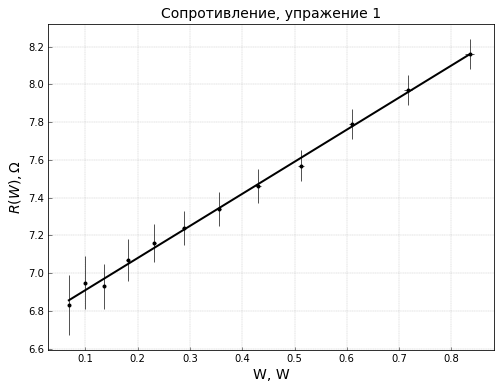

In [18]:
%matplotlib inline
from plotter import Plotter
fit = Plotter(draw_legend=False).set_name("219_1").set_title("Сопротивление, упражение 1").set_x_name("W, W").set_y_name("$R(W),\Omega$").\
        add_line(Plotter.get_new_line(x_value=W, y_value=R,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker='v')).\
        plot(show=True, save=True)

In [20]:
print("R = {}".format(str(fit[0].r)))
R0 = Value(values=[float(fit[0].b)], syst=float(fit[0].sigma_b))
G = Value(values=[float(fit[0].a)], syst=float(fit[0].sigma_a))
print("R0 = {} G = {}".format(str(R0), str(G)))

R = 0.9982054525871402
R0 = 6.740 ± 0.004 G = 1.699 ± 0.014


In [22]:
r1 = 0.05 * 10**-3
r2 = 4.5 * 10**-3
L = 29.5 * 10**-2
alpha = 2.6 * 10**-3
from math import log, pi
kmid = G**-1 * (R0 * alpha * log(r2/r1)) / (2 * pi * L)
print("k={}".format(str(kmid)))

k=0.0250 ± 0.0002


In [23]:
deltaP = tab1["U"] * 3.66 + 49.5
k = W / (R - R0) * (R0 * alpha * log(r2/r1)) / (2 * pi * L)

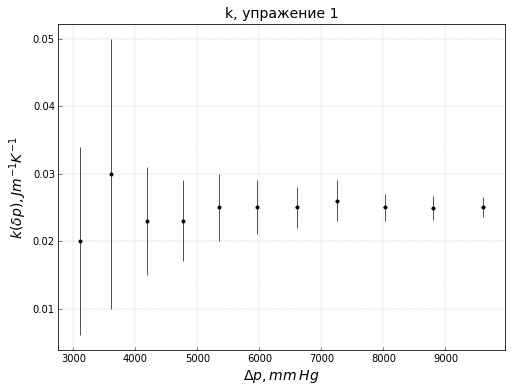

In [29]:
from plotter import Plotter
fit = Plotter(draw_legend=False).set_name("219_2").set_title("k, упражение 1").set_x_name("$\Delta p, mm\:Hg$").set_y_name("$k(\delta p),J m^{-1} K^{-1}$").\
        add_line(Plotter.get_new_line(x_value=deltaP[1::], y_value=k[1::],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker='v')).\
        plot(show=True, save=True)

In [30]:
tab2

,p,flow
0,-50.0 ± 1.9,-0.10 ± 0.20
1,50 ± 2,12.1 ± 0.2
2,152 ± 2,25.6 ± 0.3
3,253 ± 3,37.3 ± 0.3
4,387 ± 3,49.6 ± 0.3
5,451 ± 3,54.5 ± 0.3
6,550 ± 3,60.9 ± 0.4
7,640 ± 4,66.3 ± 0.4
8,744 ± 4,71.5 ± 0.4
9,855 ± 4,76.6 ± 0.4


In [48]:
Iv = tab2["flow"] * 0.559 + tab2["flow"]**2 * 0.0142 - tab2["flow"]**3 * 2.79 * 10**-4 + tab2["flow"]**4 * 2.59 * 10**-8 + 0.998
Iv = Iv * 10 ** -6
R = 0.001
l = 0.23
eta = Iv ** -1 * tab2["p"] * pi * R**4 / (8 * l)
Cv = eta**-1 * 0.025 / 8.31 / 2.0 / 29.0
print("\n".join(map(str, Cv)))

-0.57 ± 0.07
5.7 ± 0.3
3.99 ± 0.07
3.26 ± 0.04
2.337 ± 0.018
1.934 ± 0.016
1.383 ± 0.018
0.93 ± 0.02
0.50 ± 0.03
0.09 ± 0.03
-0.12 ± 0.03
-0.52 ± 0.03
-0.68 ± 0.04
-0.82 ± 0.04
-0.98 ± 0.04
-1.12 ± 0.04
-1.19 ± 0.04
-1.30 ± 0.04
-1.38 ± 0.04
-1.46 ± 0.04
-1.49 ± 0.04
